In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# %matplotlib notebook
%matplotlib inline

plt.rcParams['figure.figsize'] = [8, 6]

In [ ]:
!gdown "1Egv9Q7MnDqPHNO25n-bmGUs4qOcgal4b"

hp = pd.read_csv('house-prices.csv')
hp

Downloading...
From: https://drive.google.com/uc?id=1Egv9Q7MnDqPHNO25n-bmGUs4qOcgal4b
To: /content/house-prices.csv
100% 3.87k/3.87k [00:00<00:00, 12.7MB/s]


,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East
...,...,...,...,...,...,...,...,...
123,124,119700,1900,3,3,3,Yes,East
124,125,147900,2160,4,3,3,Yes,East
125,126,113500,2070,2,2,2,No,North
126,127,149900,2020,3,3,1,No,West


Text(0.5, 1.0, 'Price vs Square Feet')

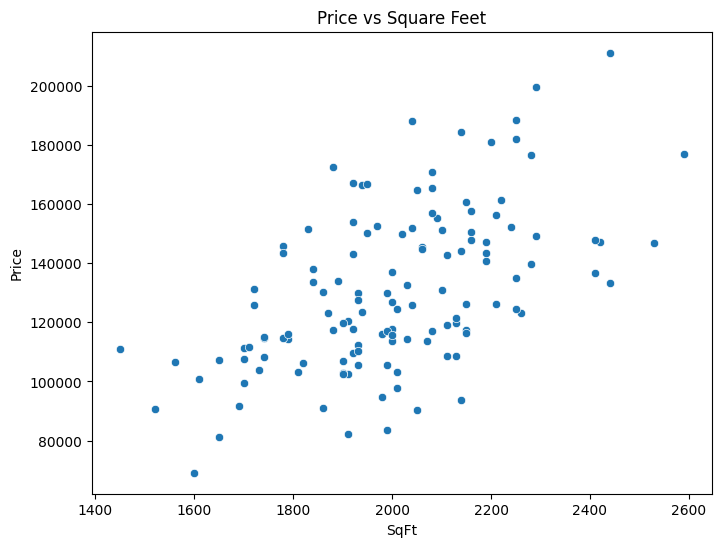

In [ ]:
sns.scatterplot(x='SqFt', y='Price', data=hp).set_title('Price vs Square Feet')

## First step: Create train/test splits

- Train set is to fit the model (find the weights)
- Test set, after the model is trained, evaluate the model on data never seen before


In [4]:
X_train

NameError: name 'X_train' is not defined

In [3]:
# Features -> X
X = hp["SqFt"]

# Target labels -> y
y = hp["Price"]

X_train, X_test, y_train, y_test = train_test_split(
  X, y,
  test_size=0.2,
  random_state=3, # we set a specific random_state so that we get the same ("random") partitioning each time
  shuffle=True    # we set shuffle to True so that the data is shuffled randomly before partitioning
)

X_train[0]
# X_train.iloc[0], y_train.iloc[0]

NameError: name 'hp' is not defined

In [ ]:
X.shape

(128,)

In [ ]:
X_train.shape, X_test.shape

((102,), (26,))

In [ ]:
y_train.shape, y_test.shape

((102,), (26,))

## Create a baseline (naive) model

In [1]:
class NaiveRegressor():
  """
  This model will compute the mean from our
  training dataset and will use that value
  as the predicted value for any given input.

  h(x) = median(train_labels)
  """

  def __init__(self):
    self.w0 = 0
    self.w1 = 0

  def cost(self, X, y):

    # MSE: mean squared error
    diff = (self.predict(X) - y)**2
    m    = len(X)
    diff_sum = sum(diff) / m
    return diff_sum

  def fit(self, X, y):
    self.w0 = np.median(y)

  def predict(self, x):
    return self.w0


- **fit()** -> trains the model
- **predict()** -> uses the trained to get a prediction
- **transform()** -> uses the trained model to transform data, not used here but common to have it in scalers like MinMaxScaler()

In [5]:
# Create the regressor model
nv_regressor = NaiveRegressor()

# Calculate cost without training the model
nv_regressor.cost(X=X_train, y=y_train)

NameError: name 'X_train' is not defined

In [ ]:
# Predict returns 0 because we dind't train the model yet
# Weights are not set
nv_regressor.predict(1000)

0

In [ ]:
# Create and train the model
nv_regressor = NaiveRegressor()
nv_regressor.fit(X=X_train, y=y_train) # <- sets w0 to be the median
nv_regressor.cost(X=X_train, y=y_train)


753777205.882353

In [ ]:
nv_regressor.predict(250)

126250.0

In [ ]:
nv_regressor.predict(70)

126250.0

In [ ]:
nv_regressor.predict(-100)

126250.0

<Axes: title={'center': 'Price vs Square Feet'}, xlabel='SqFt', ylabel='Price'>

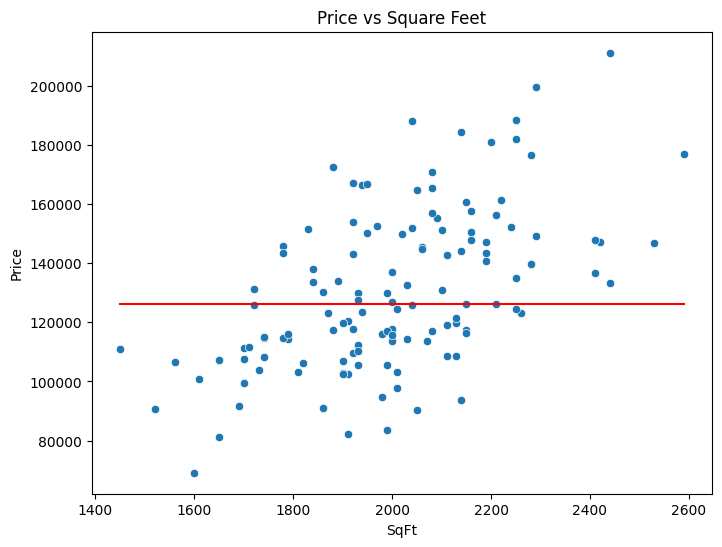

In [ ]:
sns.scatterplot(x='SqFt', y='Price', data=hp).set_title('Price vs Square Feet')

x1 = hp["SqFt"].min()
x2 = hp["SqFt"].max()
y1 = nv_regressor.predict(x1)
y2 = nv_regressor.predict(x2)
sns.lineplot(x=[x1, x2,], y=[y1, y2,], color='r')

In [ ]:
class RandLinearRegressor():
  """
  Linear regression model in which weights are
  chosen by random sampling.
  """

  def __init__(self, max_iter):
    self.w0 = 0
    self.w1 = 0
    self._max_iter = max_iter

  def cost(self, X, y):

    # MSE: mean squared error
    diff = (self.predict(X) - y)**2
    m    = len(X)
    diff_sum = sum(diff) / m
    return diff_sum

  def fit(self, X, y):
    for i in range(self._max_iter):
      initial_cost = self.cost(X, y)
      tmp_w0, tmp_w1 = self.w0, self.w1

      self.w0, self.w1 = np.random.randint(-10000, 10000, 2)
      cost_value = self.cost(X, y)
      if cost_value > initial_cost:
        self.w0, self.w1 = tmp_w0, tmp_w1

  def predict(self, x):
    y = self.w1 * x + self.w0
    return y


In [ ]:
%%time

# Create and train the model
nv_regressor = RandLinearRegressor(max_iter=10000)

nv_regressor.fit(X=X_train, y=y_train)

CPU times: user 10.2 s, sys: 130 ms, total: 10.4 s
Wall time: 12.9 s


In [ ]:
nv_regressor.w0, nv_regressor.w1

(3756, 63)

In [ ]:
nv_regressor.predict(20000)

1263756

<Axes: title={'center': 'Price vs Square Feet'}, xlabel='SqFt', ylabel='Price'>

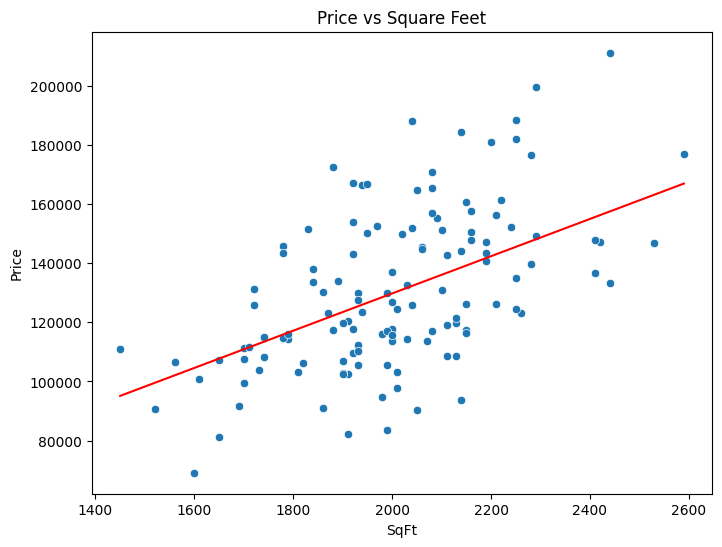

In [ ]:
sns.scatterplot(x='SqFt', y='Price', data=hp).set_title('Price vs Square Feet')

x1 = hp["SqFt"].min()
x2 = hp["SqFt"].max()
y1 = nv_regressor.predict(x1)
y2 = nv_regressor.predict(x2)
sns.lineplot(x=[x1, x2,], y=[y1, y2,], color='r')

In [ ]:
train_cost = nv_regressor.cost(X=X_train, y=y_train)
train_cost


507472091.6666667

In [ ]:
test_cost = nv_regressor.cost(X=X_test, y=y_test)
test_cost

459516717.3076923

In [ ]:
train_cost - test_cost

## Train Linear Regression model on data

In [ ]:
lr1 = SGDRegressor()


In [ ]:
# This will fail bacause we didn't train the model yet
# Weights aren't set at this point
# lr1.coef_, lr1.lr1.intercept_

In [ ]:
# Train model and check weights again
lr1 = SGDRegressor(eta0=0.1, max_iter=1000, verbose=1, random_state=0)

lr1.fit(X_train.values.reshape(-1, 1), y_train)


-- Epoch 1
Norm: 17069376746322.33, NNZs: 1, Bias: 4077409857.562061, T: 102, Avg. loss: 6298018450022270493158025512091648.000000
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 35122105113327.12, NNZs: 1, Bias: -52506811881.841217, T: 204, Avg. loss: 2273180580979247186137289777479680.000000
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 7836988302447.91, NNZs: 1, Bias: -52185307452.439949, T: 306, Avg. loss: 1965142930423927331719811350659072.000000
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 20726456057270.15, NNZs: 1, Bias: -6786749716.437687, T: 408, Avg. loss: 1695995639156184490776290838708224.000000
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 20095948877482.40, NNZs: 1, Bias: -7226031281.697067, T: 510, Avg. loss: 1278790698528202555977788442017792.000000
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 413296907155.62, NNZs: 1, Bias: -8038140915.139126, T: 612, Avg. loss: 1286642047410386643969783506141184.000000
Total training time: 0.01 seconds.


SGDRegressor(eta0=0.1, random_state=0, verbose=1)

In [ ]:
lr1.coef_

array([-1.60158125e+13])

In [ ]:
lr1.intercept_

array([8.16184838e+09])

### Plot data and trained model

Equation: y = 8161848377.02 + -16015812460639.79x1


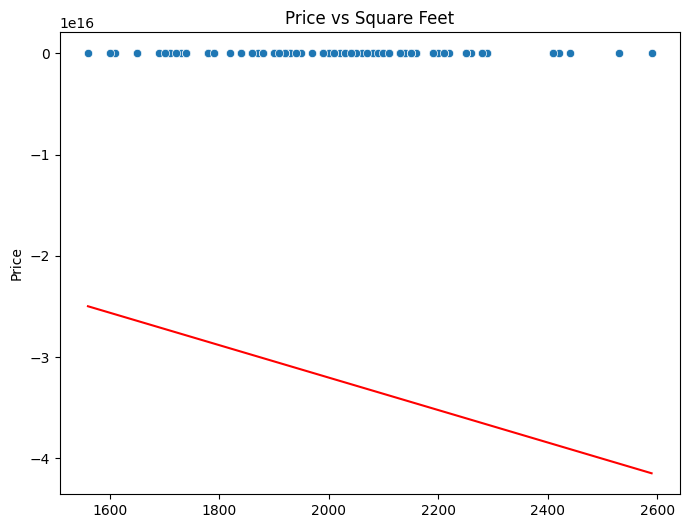

In [ ]:
print(f"Equation: y = {lr1.intercept_[0]:.2f} + {lr1.coef_[0]:.2f}x1")

x1 = X_train.min()
y1 = (lr1.coef_ * x1 + lr1.intercept_)[0]
x2 = X_train.max()
y2 = (lr1.coef_ * x2 + lr1.intercept_)[0]

sns.scatterplot(x=X_train.values, y=y_train).set_title('Price vs Square Feet')
sns.lineplot(x=[x1, x2,], y=[y1, y2,], color='r')
plt.show()

In [ ]:
lr1.predict([[2400]])

array([-3.84379417e+16])

## Let's use some Feature Engineering

We will scale our data first in order to help SGD algorithm to converge easier.

In [ ]:
std_scaler = StandardScaler()
# Fit the scaler on train data ONLY!
std_scaler.fit(X_train.values.reshape(-1, 1))
X_train_scaled = std_scaler.transform(X_train.values.reshape(-1, 1))

# Now let's create our model and use the scaled features for training
lr1 = SGDRegressor(verbose=1, random_state=0)
lr1.fit(X_train_scaled, y_train)


-- Epoch 1
Norm: 7248.96, NNZs: 1, Bias: 45303.616439, T: 102, Avg. loss: 5795093310.760985
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 8909.86, NNZs: 1, Bias: 67005.114448, T: 204, Avg. loss: 3025217057.343388
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 10006.07, NNZs: 1, Bias: 81464.083077, T: 306, Avg. loss: 1848122286.557906
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 10780.66, NNZs: 1, Bias: 91891.369470, T: 408, Avg. loss: 1220413461.172534
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 11412.59, NNZs: 1, Bias: 99667.404336, T: 510, Avg. loss: 858305366.949015
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 11868.25, NNZs: 1, Bias: 105598.771395, T: 612, Avg. loss: 639816983.441255
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 12266.05, NNZs: 1, Bias: 110196.436335, T: 714, Avg. loss: 503777580.826952
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 12567.15, NNZs: 1, Bias: 113837.377136, T: 816, Avg. loss: 416872344.548265
Total training

SGDRegressor(random_state=0, verbose=1)

Equation: y = 130885.11 + 13895.85x1


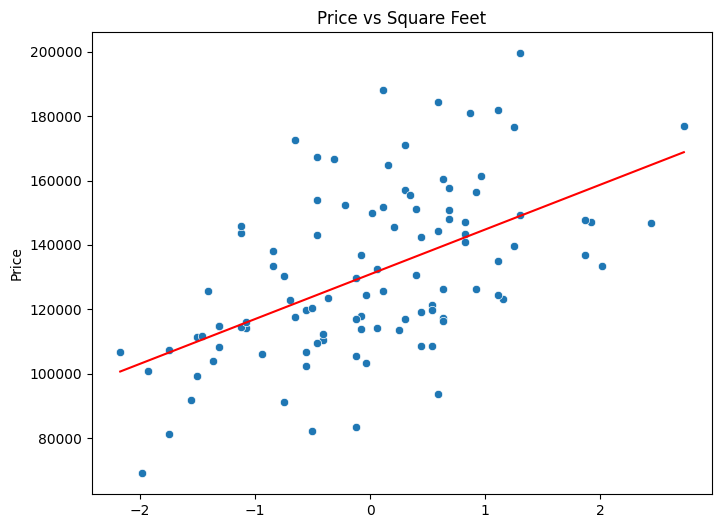

In [ ]:
print(f"Equation: y = {lr1.intercept_[0]:.2f} + {lr1.coef_[0]:.2f}x1")

x1 = X_train_scaled.min()
y1 = (lr1.coef_ * x1 + lr1.intercept_)[0]
x2 = X_train_scaled.max()
y2 = (lr1.coef_ * x2 + lr1.intercept_)[0]

sns.scatterplot(x=X_train_scaled.flatten(), y=y_train).set_title('Price vs Square Feet')
sns.lineplot(x=[x1, x2,], y=[y1, y2,], color='r')
plt.show()

In [ ]:
# Make predictions on train dataset
y_train_pred = lr1.predict(X_train_scaled)


In [ ]:
# Make predictions on test dataset
X_test_scaled = std_scaler.transform(X_test.values.reshape(-1, 1))
y_test_pred = lr1.predict(X_test_scaled)


## Linear Regression with two features

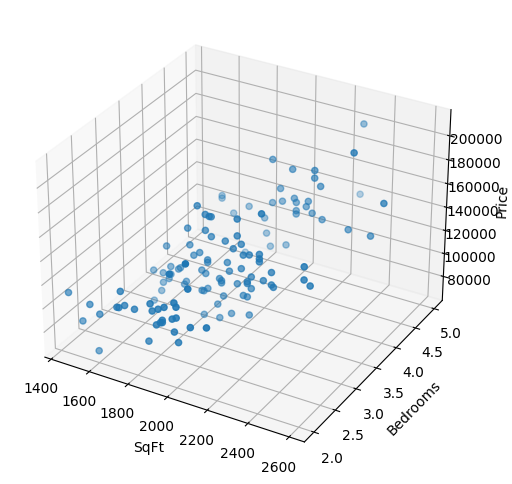

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = hp["SqFt"]
y = hp["Bedrooms"]
z = hp["Price"]

ax.set_xlabel("SqFt")
ax.set_ylabel("Bedrooms")
ax.set_zlabel("Price")

ax.scatter(x, y, z)

plt.show()

In [ ]:
# Training code
lr2 = SGDRegressor(random_state=0)

X = hp[["SqFt", "Bedrooms"]].values
y = hp.Price.values

std_scaler = StandardScaler()
X_scaled = std_scaler.fit_transform(X)

lr2.fit(X_scaled, y)


SGDRegressor(random_state=0)

Equation: y = 130435.57 + 10414.80x1 + 9039.34x2


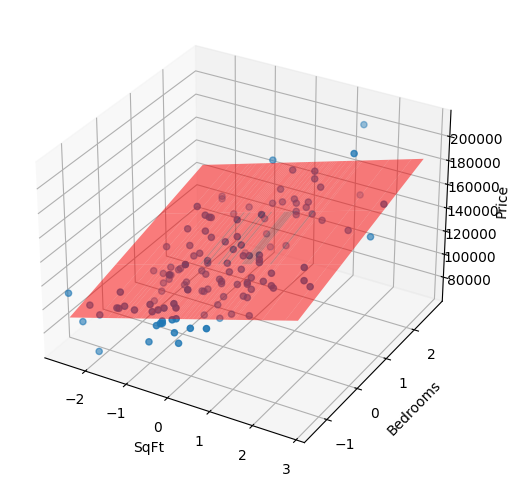

In [ ]:
# Plot code
coefs = lr2.coef_
intercept = lr2.intercept_
num_samples = len(X)

x = X_scaled[:, 0]
y = X_scaled[:, 1]
z = hp.Price.values
xs = np.tile(np.sort(x), (num_samples, 1))
ys = np.tile(np.sort(y), (num_samples, 1)).T
zs = xs*coefs[0] + ys*coefs[1] + intercept
print(f"Equation: y = {intercept[0]:.2f} + {coefs[0]:.2f}x1 + {coefs[1]:.2f}x2")

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

ax.set_xlabel("SqFt")
ax.set_ylabel("Bedrooms")
ax.set_zlabel("Price")

ax.scatter(x, y, z)
ax.plot_surface(xs,ys,zs, alpha=0.5, color='r')

plt.show()

In [ ]:
y_pred = lr2.predict(X_scaled)


## Regression with Polynomial Features

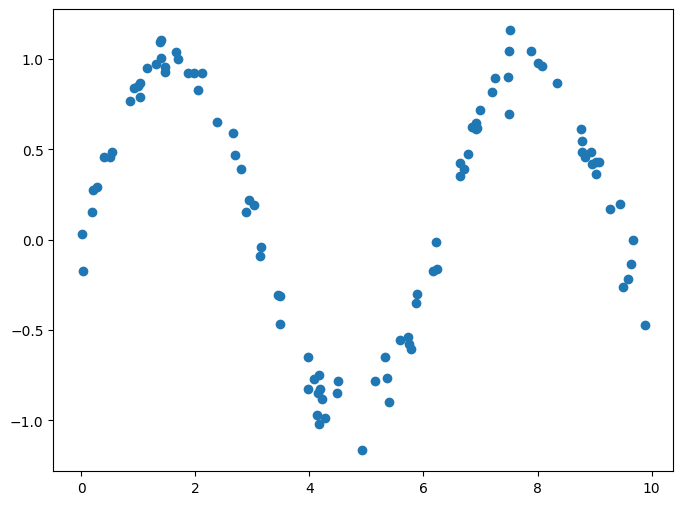

In [ ]:
# Generate a random dataset
rng = np.random.RandomState(1)
num_samples = 100
x = 10 * rng.rand(num_samples)
x.sort()
y = np.sin(x) + 0.1 * rng.randn(num_samples)

plt.scatter(x, y)

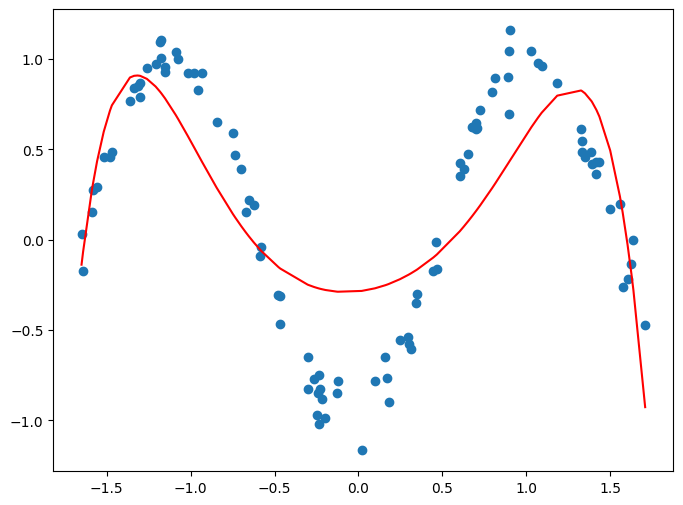

In [ ]:
x_scaled = StandardScaler().fit_transform(x.reshape(-1, 1))

poly_model = make_pipeline(
  PolynomialFeatures(6),
  SGDRegressor(random_state=0)
)
poly_model.fit(x_scaled, y)
yfit = poly_model.predict(x_scaled)

plt.scatter(x_scaled, y)
plt.plot(x_scaled, yfit, color='red')